In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np

In [3]:
import glob
import matplotlib.image as mpimg

# import the raw images
x_train = []
x_test = []
for image in glob.glob('keras_png_slices_data/keras_png_slices_train/*.png'):
    x_train.append(mpimg.imread(image))
for image in glob.glob('keras_png_slices_data/keras_png_slices_test/*.png'):
    x_test.append(mpimg.imread(image))

In [7]:
# normalise each input and reshape each image into 1D
x_train = np.array(x_train).astype('float32') / 255.
x_test = np.array(x_test).astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape, x_test.shape)

(9664, 65536) (544, 65536)


In [8]:
depth = 32 # how much encoding to apply
length = 65536
batch_size = 256

In [9]:
# create the network
inputs = Input(shape=(length,))
encoded = Dense(depth*4, activation='relu')(inputs)
encoded = Dense(depth*2, activation='relu')(encoded)
encoded = Dense(depth, activation='relu')(encoded)

decoded = Dense(depth*2, activation='relu')(encoded)
decoded = Dense(depth*4, activation='relu')(decoded)
decoded = Dense(length, activation='sigmoid')(decoded)

# map an input to its reconstruction to create model
autoencoder = Model(inputs, decoded)

# create sub network
encoder = Model(inputs, encoded)

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
#fit to data
autoencoder.fit(x_train, x_train, epochs=100, batch_size=batch_size, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
38/38 [==============================] - 19s 486ms/step - loss: 0.6756 - val_loss: 0.5961
Epoch 2/100
38/38 [==============================] - 18s 481ms/step - loss: 0.1716 - val_loss: 5.2899e-05
Epoch 3/100
38/38 [==============================] - 18s 476ms/step - loss: 3.2266e-05 - val_loss: 2.9519e-05
Epoch 4/100
38/38 [==============================] - 18s 478ms/step - loss: 2.8932e-05 - val_loss: 2.9426e-05
Epoch 5/100
38/38 [==============================] - 18s 475ms/step - loss: 2.8894e-05 - val_loss: 2.9407e-05
Epoch 6/100
38/38 [==============================] - 18s 478ms/step - loss: 2.8875e-05 - val_loss: 2.9388e-05
Epoch 7/100
38/38 [==============================] - 18s 474ms/step - loss: 2.8855e-05 - val_loss: 2.9368e-05
Epoch 8/100
38/38 [==============================] - 18s 472ms/step - loss: 2.8834e-05 - val_loss: 2.9347e-05
Epoch 9/100
38/38 [==============================] - 18s 475ms/step - loss: 2.8812e-05 - val_loss: 2.9325e-05
Epoch 10/100
38/38 [==

In [13]:
decoded_imgs = autoencoder.predict(x_test)

17/17 [==============================] - 0s 11ms/step


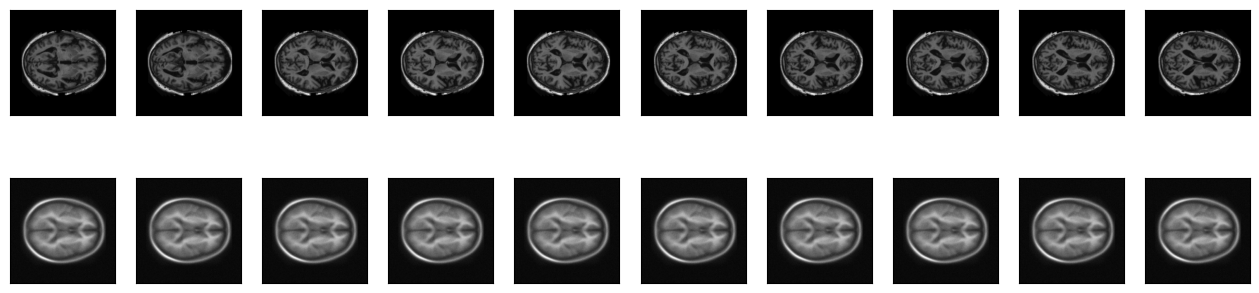

In [16]:
import matplotlib.pyplot as plt

n = 10  # how many scans we will display
plt.figure(figsize=(16, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(256, 256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(256, 256))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()